In [477]:
import numpy as np
import pandas as pd
import plotly
from plotly.graph_objs import Figure, Histogram, Layout, Scatter, Bar, Pie
plotly.tools.set_credentials_file(username='qnguyen93', api_key='f4Ypz6n94w9T1PDIK5d6')
import scipy as stats
import seaborn as sns
plotly.offline.init_notebook_mode(connected=True)

In [478]:
opentable = pd.read_csv('opentable_data.csv', index_col = 0) #import
opentable['num_reviews'] = opentable['num_reviews'].replace(np.nan, '0') #replace 'naN' with 0 reviews
opentable['recommendation_percentage'] = opentable['recommendation_percentage'].apply(lambda x: x.replace('%','')).astype(int) #make recommendation percentage an integer for analysis
opentable['num_reviews'] = opentable['num_reviews'].apply(lambda x: int(x)) # make number of reviews an integer (cleaning)
opentable = opentable.drop_duplicates() # delete duplicate rows
opentable = opentable.replace(['Theater District / Times Square','Rockefeller Center Midtown'],['Times Square','Midtown'])
has_chef_name = opentable['chef'].map(lambda x: (True if type(x)!=float else False))
opentable['has_chef_name'] = has_chef_name

In [479]:
opentable

,location,cuisine,price,food_rating,service_rating,ambience_rating,value_rating,num_reviews,recommendation_percentage,chef,dining_style,dress_code,noise_level,has_chef_name
restaurant,,,,,,,,,,,,,,
Gabriel Kreuther,Midtown West,Contemporary French / American,$50 and over,4.8,4.8,4.8,4.3,1269,91,Gabriel Kreuther,Fine Dining,Business Casual,Quiet,True
Davio's Northern Italian Steakhouse - Manhattan,Midtown East,Steakhouse,$31 to $50,4.5,4.5,4.4,4.2,947,93,Steve DiFillippo Chef/Owner,Fine Dining,Smart Casual,Moderate,True
Empellon Taqueria,West Village,Mexican,$31 to $50,4.5,4.6,4.4,4.1,1581,81,Alex Stupak,Casual Dining,Smart Casual,Moderate,True
A√±ejo Tribeca,TriBeCa - Downtown,Mexican,$31 to $50,4.5,4.3,4.3,4.1,422,82,Ricardo Camacho,Casual Dining,Smart Casual,Moderate,True
Yopparai,Lower East Side,Izakaya,$50 and over,4.8,4.8,4.7,4.4,310,95,Junya Miura,Casual Elegant,Casual Dress,Quiet,True
db Bistro moderne,Times Square,French,$31 to $50,4.5,4.5,4.3,4.0,6968,91,Christopher Stam,Casual Dining,Smart Casual,Moderate,True
Boqueria West 40th Street,Midtown West,Spanish,$30 and under,4.5,4.4,4.4,4.1,376,93,Marc Vidal,Casual Dining,Casual Dress,Moderate,True
Il Corso (New York City),Midtown West,Italian,$31 to $50,4.7,4.7,4.4,4.3,2062,95,Paolo Nozzoli,Casual Elegant,Casual Dress,Moderate,True
Serafina at The Time Hotel,Times Square,Italian,$31 to $50,4.2,4.1,4.0,3.9,516,81,NaN,Casual Dining,Smart Casual,Moderate,False


In [480]:
opentable.corr(method = 'pearson')['food_rating'].sort_values(ascending=False)

food_rating                  1.000000
service_rating               0.804772
value_rating                 0.719260
ambience_rating              0.655053
recommendation_percentage    0.596726
num_reviews                  0.167223
has_chef_name                0.155563
Name: food_rating, dtype: float64

/Users/quocnguyen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5, 0.98, 'Correlations')

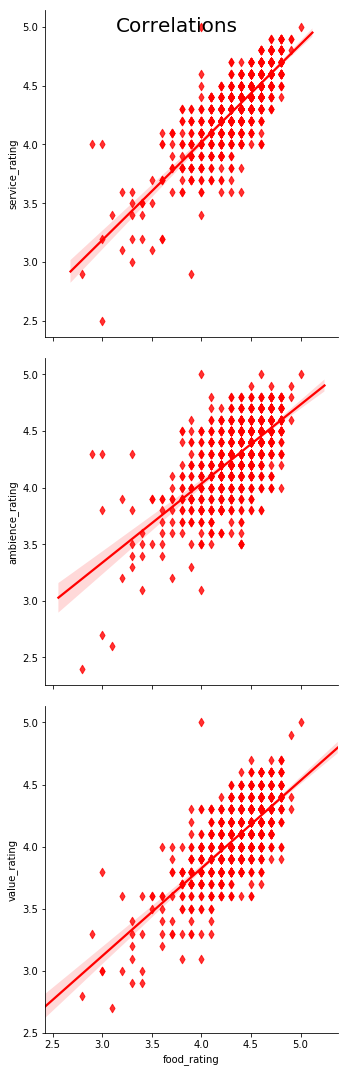

In [481]:
corr = sns.pairplot(x_vars = ["food_rating"], y_vars = ["service_rating",'ambience_rating','value_rating'], data = opentable,
            kind='reg',height=5, plot_kws={'marker':'d','color':'red'})
corr.fig.suptitle('Correlations',fontsize=20)



In [482]:
initial = opentable.groupby('location').mean().sort_values('food_rating',ascending=False).reset_index()
initial

,location,food_rating,service_rating,ambience_rating,value_rating,num_reviews,recommendation_percentage,has_chef_name
0,Turtle Bay,4.550000,4.600000,4.300000,4.350000,107.000000,100.000000,0.500000
1,Little Italy,4.491667,4.400000,4.350000,4.341667,356.083333,92.750000,0.333333
2,NoLita,4.487500,4.412500,4.487500,4.187500,606.625000,90.625000,0.250000
3,West Village,4.479747,4.402532,4.420253,4.168354,584.050633,88.949367,0.607595
4,SoHo,4.470175,4.364912,4.412281,4.156140,822.701754,86.789474,0.754386
5,East Village,4.462821,4.369231,4.337179,4.214103,419.051282,87.756410,0.628205
6,TriBeCa - Downtown,4.456522,4.406522,4.434783,4.100000,873.217391,88.500000,0.673913
7,Lower East Side,4.456098,4.326829,4.400000,4.190244,597.317073,88.878049,0.658537
8,Greenwich Village,4.450000,4.389474,4.413158,4.186842,1269.736842,89.394737,0.578947
9,Gramercy / Flatiron,4.449206,4.353968,4.371429,4.090476,1109.222222,88.206349,0.746032


In [483]:
initialg = [Bar(x=initial['location'], y=initial['food_rating'],marker=dict(color='rgba(222,45,38,0.8)'))]

In [484]:
layout = Layout(title="Location VS. Food Rating",yaxis=dict(title='Average Food Rating',range=(2.5,4.5)), autosize = False, height = 600, width = 1200)

fig = Figure(data=initialg, layout=layout)
#
# plotly.offline.iplot(fig,show_link = False)
plotly.plotly.iplot(fig, fileopt = 'new', filename = 'Location vs. Food Rating Initial')


/Users/quocnguyen/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [485]:
list = ['Kips Bay','Garment District / Flower District','Chinatown','Yorkville','Turtle Bay','Hudson Yards']
for x in list:
    opentable = opentable.loc[opentable.location != x]
    
location = opentable.groupby(['location']) #group by locations


In [486]:
location.mean().sort_values(['food_rating'],ascending=False)

,food_rating,service_rating,ambience_rating,value_rating,num_reviews,recommendation_percentage,has_chef_name
location,,,,,,,
Little Italy,4.491667,4.400000,4.350000,4.341667,356.083333,92.750000,0.333333
NoLita,4.487500,4.412500,4.487500,4.187500,606.625000,90.625000,0.250000
West Village,4.479747,4.402532,4.420253,4.168354,584.050633,88.949367,0.607595
SoHo,4.470175,4.364912,4.412281,4.156140,822.701754,86.789474,0.754386
East Village,4.462821,4.369231,4.337179,4.214103,419.051282,87.756410,0.628205
TriBeCa - Downtown,4.456522,4.406522,4.434783,4.100000,873.217391,88.500000,0.673913
Lower East Side,4.456098,4.326829,4.400000,4.190244,597.317073,88.878049,0.658537
Greenwich Village,4.450000,4.389474,4.413158,4.186842,1269.736842,89.394737,0.578947
Gramercy / Flatiron,4.449206,4.353968,4.371429,4.090476,1109.222222,88.206349,0.746032


In [487]:
location = location.mean().sort_values('food_rating',ascending = False).reset_index()


In [488]:
locationg = [Bar(x=location['location'], y=location['food_rating'],marker=dict(color='rgba(222,45,38,0.8)'))]

In [489]:
layout = Layout(title="Location VS. Food Rating",yaxis=dict(title='Average Food Rating',range=(2.5,4.5)), autosize = False, height = 600, width = 1000)

fig = Figure(data=locationg, layout=layout)

# plotly.offline.iplot(fig,show_link = False)
plotly.plotly.iplot(fig, fileopt = 'overwrite', filename = 'Location vs. Food Rating')


/Users/quocnguyen/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [490]:
noise = opentable.groupby('noise_level')['food_rating','service_rating','ambience_rating','value_rating'].mean().sort_values('food_rating',ascending=False)
noise

,food_rating,service_rating,ambience_rating,value_rating
noise_level,,,,
Quiet,4.450965,4.453668,4.328958,4.149035
Moderate,4.388179,4.328041,4.311648,4.097066
Energetic,3.750000,3.750000,3.950000,3.683333


In [491]:
noise2 = noise.reset_index()
noiseg = [Bar(x=noise2['noise_level'], y=noise2['food_rating'],marker=dict(color='rgba(222,45,38,0.8)'),width = 0.5)]

In [492]:
layout = Layout(title="Noise Level VS. Food Rating",xaxis=dict(title="Noise Level"), yaxis=dict(title='Average Food Rating',range=(3.5,4.8)))

fig = Figure(data=noiseg, layout=layout)

# plotly.offline.iplot(fig,show_link = False)
plotly.plotly.iplot(fig, fileopt = 'new', filename = 'Noise vs. Food Rating')


/Users/quocnguyen/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [493]:
price = opentable.groupby('price')['food_rating','service_rating','ambience_rating','value_rating'].mean().sort_values('food_rating',ascending=False)
price

,food_rating,service_rating,ambience_rating,value_rating
price,,,,
$50 and over,4.552632,4.544211,4.513684,4.102105
$31 to $50,4.430035,4.379688,4.374132,4.086806
$30 and under,4.322948,4.264590,4.202128,4.121277


In [494]:
price2 = price.reset_index()
priceg = [Bar(x=price2['price'], y=price2['food_rating'],marker=dict(color='rgba(222,45,38,0.8)'),width = 0.5)]

In [495]:
layout = Layout(title="Price VS. Food Rating",xaxis=dict(title="Price"), yaxis=dict(title='Average Food Rating',range=(3.5,4.6)))

fig = Figure(data=priceg, layout=layout)

# plotly.offline.iplot(fig,show_link = False)
plotly.plotly.iplot(fig, fileopt = 'new', filename = 'Price vs. Food Rating')


/Users/quocnguyen/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [496]:
chef = opentable.groupby('has_chef_name')['food_rating','service_rating','ambience_rating','value_rating'].mean().sort_values('food_rating',ascending=False)
chef

,food_rating,service_rating,ambience_rating,value_rating
has_chef_name,,,,
True,4.430105,4.391365,4.357876,4.106068
False,4.346737,4.283598,4.245855,4.102822


In [497]:
chef2 = chef.reset_index()
chefg = [Bar(x=chef2['has_chef_name'], y=chef2['food_rating'],marker=dict(color='rgba(222,45,38,0.8)'),width = 0.5)]

In [498]:
layout = Layout(title="Chef Name VS. Food Rating",xaxis=dict(title="Chef Name"), yaxis=dict(title='Average Food Rating',range=(4,4.5)))

fig = Figure(data=chefg, layout=layout)

# plotly.offline.iplot(fig,show_link = False)
plotly.plotly.iplot(fig, fileopt = 'new', filename = 'Chef vs. Food Rating')


/Users/quocnguyen/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [499]:
opentable2 = opentable.loc[opentable.noise_level != 'Energetic']
opentable2 = opentable2.loc[opentable.price != '$30 and under']
opentable2 = opentable2.loc[opentable.has_chef_name != False]
opentable2

,location,cuisine,price,food_rating,service_rating,ambience_rating,value_rating,num_reviews,recommendation_percentage,chef,dining_style,dress_code,noise_level,has_chef_name
restaurant,,,,,,,,,,,,,,
Gabriel Kreuther,Midtown West,Contemporary French / American,$50 and over,4.8,4.8,4.8,4.3,1269,91,Gabriel Kreuther,Fine Dining,Business Casual,Quiet,True
Davio's Northern Italian Steakhouse - Manhattan,Midtown East,Steakhouse,$31 to $50,4.5,4.5,4.4,4.2,947,93,Steve DiFillippo Chef/Owner,Fine Dining,Smart Casual,Moderate,True
Empellon Taqueria,West Village,Mexican,$31 to $50,4.5,4.6,4.4,4.1,1581,81,Alex Stupak,Casual Dining,Smart Casual,Moderate,True
A√±ejo Tribeca,TriBeCa - Downtown,Mexican,$31 to $50,4.5,4.3,4.3,4.1,422,82,Ricardo Camacho,Casual Dining,Smart Casual,Moderate,True
Yopparai,Lower East Side,Izakaya,$50 and over,4.8,4.8,4.7,4.4,310,95,Junya Miura,Casual Elegant,Casual Dress,Quiet,True
db Bistro moderne,Times Square,French,$31 to $50,4.5,4.5,4.3,4.0,6968,91,Christopher Stam,Casual Dining,Smart Casual,Moderate,True
Il Corso (New York City),Midtown West,Italian,$31 to $50,4.7,4.7,4.4,4.3,2062,95,Paolo Nozzoli,Casual Elegant,Casual Dress,Moderate,True
Nusr-Et Steakhouse New York,Midtown West,Steakhouse,$50 and over,4.6,4.5,4.6,3.9,1248,84,Nusret Gokce,Fine Dining,Smart Casual,Moderate,True
Empellon Midtown,Midtown East,Contemporary Mexican,$31 to $50,4.5,4.5,4.4,3.9,776,88,Duncan Grant,Casual Dining,Casual Dress,Moderate,True


In [500]:
location2 = opentable2.groupby('location')
location2.mean().sort_values('food_rating',ascending=False)

,food_rating,service_rating,ambience_rating,value_rating,num_reviews,recommendation_percentage,has_chef_name
location,,,,,,,
NoLita,4.700000,4.600000,4.600000,4.200000,3197.000000,92.000000,True
Union Square,4.616667,4.566667,4.566667,4.116667,2909.166667,90.833333,True
East Village,4.609524,4.533333,4.485714,4.209524,588.428571,92.428571,True
Lower East Side,4.558333,4.416667,4.508333,4.208333,1271.500000,90.250000,True
Financial District,4.541667,4.583333,4.525000,4.158333,890.583333,94.333333,True
TriBeCa - Downtown,4.529167,4.479167,4.470833,4.112500,1084.875000,88.333333,True
SoHo,4.520000,4.417143,4.440000,4.171429,870.400000,88.542857,True
Midtown East,4.502740,4.483562,4.424658,4.076712,1461.876712,88.315068,True
West Village,4.500000,4.454545,4.490909,4.112121,851.878788,88.151515,True


In [501]:
location2 = location2.mean().sort_values('food_rating',ascending=False).reset_index()
colors = 3*['green'] + 21*['rgba(204,204,204,1)'] + 4*['red']
locationg2 = [Bar(x=location2['location'], y=location2['food_rating'],marker=dict(color=colors))]

In [502]:
layout2 = Layout(title="Location VS. Food Rating",yaxis=dict(title='Average Food Rating',range=(2.5,4.8)), autosize = False, height = 600, width = 1000)

fig2 = Figure(data=locationg2, layout=layout2)

# plotly.offline.iplot(fig2,show_link = False)
plotly.plotly.iplot(fig2, fileopt = 'overwrite', filename = 'Location_2 vs. Food Rating')


/Users/quocnguyen/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [503]:
cuisine = opentable2.groupby(['location','cuisine'])
cuisine.mean().sort_values(['location','food_rating','cuisine'],ascending=False)

food_rating  service_rating  \
location        cuisine                                               
West Village    Vegan                      4.700000        4.600000   
                Seafood                    4.700000        4.700000   
                Caribbean                  4.700000        4.500000   
                Austrian                   4.700000        4.700000   
                Italian                    4.580000        4.580000   
                Yakitori                   4.500000        4.400000   
                Mexican                    4.500000        4.600000   
                Japanese                   4.500000        4.333333   
                Fine cuts                  4.500000        4.600000   
                Contemporary Mexican       4.500000        4.400000   
                Contemporary Indian        4.500000        4.400000   
                American                   4.500000        4.566667   
                French                     4.450000        4.325000   
                Peruvian                   4.400000        4.000000   
                Contemporary American      4.375000        4.375000   
                Mediterranean              4.100000        4.000000   
Upper West Side Sushi                      4.800000        4.700000   
                Greek                      4.600000        4.400000   
                Australian                 4.600000        4.700000   
                Seafood                    4.500000        4.500000   
                Mediterranean              4.500000        4.500000   
                Japanese                   4.500000        4.500000   
                French                     4.500000        4.500000   
                Italian                    4.457143        4.457143   
                Mexican / Southwestern     4.400000        4.400000   
                Latin American             4.400000        4.200000   
                French American            4.400000        4.450000   
                American                   4.400000        4.400000   
                Contemporary American      4.250000        4.300000   
                Contemporary Italian       4.200000        4.300000   
...                                             ...             ...   
East Village    Japanese                   4.700000        4.800000   
                Italian                    4.700000        4.600000   
                French                     4.666667        4.633333   
                Contemporary American      4.650000        4.550000   
                Sushi                      4.600000        4.500000   
                Seafood                    4.600000        4.600000   
                Contemporary Mexican       4.600000        4.400000   
                Contemporary Italian       4.600000        4.500000   
                Contemporary Indian        4.500000        4.400000   
                Spanish                    4.400000        4.300000   
                Vegan                      4.300000        4.200000   
                Moroccan                   4.200000        4.300000   
Columbus Circle Japanese                   4.500000        4.500000   
                Italian                    4.500000        4.600000   
                Contemporary French        4.000000        4.100000   
Chelsea         Vegetarian / Vegan         4.600000        4.700000   
                Spanish                    4.600000        4.600000   
                Japanese                   4.600000        4.500000   
                Basque                     4.600000        4.500000   
                Asian                      4.600000        4.500000   
                Tapas / Small Plates       4.500000        4.500000   
                Pan-Asian                  4.500000        4.400000   
                Korean                     4.500000        4.300000   
                Argentinean                4.500000        4.600